In [36]:
import dtale

In [37]:
import pandas as pd


In [38]:
DATA = pd.read_csv('20241023_AJUSTADO.csv')
# Listar os tipos únicos na coluna 'situacaoDisciplina'
tipos_unicos = DATA['situacaoDisciplina'].unique()

# Exibir os tipos
print(tipos_unicos)
# DATA.insert(0, 'Index', range(1, len(DATA) + 1))

['REPROVADO' 'DESISTENTE' 'BOM/APROVADO' 'MUITO BOM/APROVADO' 'APROVADO'
 'EXCELENTE/APROVADO' 'APROVADO PELO CONSELHO' 'BRILHANTE/APROVADO'
 'PONTUAÇÃO INSUFICIENTE' 'TRANSFERIDO']


In [39]:
8,  # PROJETOS PARA A VIDA
14,  # FILOSOFIA / SOCIOLOGIA
21,  # LÍNGUA PORTUGUESA
28,    # BIOLOGIA
29,  # FÍSICA
30,  # QUÍMICA

(30,)

In [40]:
# Dicionário 
mapeamento = {
    3: 1,    # ARTE
    19: 2,   # EDUCAÇÃO FÍSICA
    75: 3,   # ESCOLA DA INTELIGÊNCIA
    100: 4,  # HABILIDADES SOCIOEMOCIONAIS
    46: 5,   # LÍNGUA ESPANHOLA
    47: 6,   # LÍNGUA INGLESA
    63: 7,   # SOCIOLOGIA
    102: 8,  # PROJETOS PARA A VIDA
    114: 9,  # PRÁTICA DIREITOS HUMANOS E CIDADANIA
    40: 10,  # HISTÓRIA
    26: 11,  # FILOSOFIA
    34: 12,  # GEOGRAFIA
    59: 13,  # PRODUÇÃO TEXTUAL
    72: 14,  # FILOSOFIA / SOCIOLOGIA
    104: 15, # PRÁTICA DE ARGUMENTAÇÃO E ESCRITA
    105: 16, # ELETIVA LINGUAGENS 1
    106: 17, # ELETIVA LINGUAGENS 2
    111: 18, # ELETIVA HUMANAS 1
    112: 19, # ELETIVA HUMANAS 2
    116: 20, # PRÁTICA SAÚDE COLETIVA
    48: 21,  # LÍNGUA PORTUGUESA
    49: 22,  # LITERATURA
    109: 23, # ELETIVA NATUREZA 1
    110: 24, # ELETIVA NATUREZA 2
    113: 25, # PRÁTICA MATEMÁTICA BÁSICA
    107: 26, # ELETIVA MATEMÁTICA 1
    108: 27, # ELETIVA MATEMÁTICA 2
    8: 28,    # BIOLOGIA
    27: 29,  # FÍSICA
    60: 30,  # QUÍMICA
    38: 31,  # PORTUGUES/GRAMÁTICA
    50: 32,  # MATEMÁTICA
}

# Aplicar o mapeamento à coluna 'idDisciplina'
DATA['Diciplina'] = DATA['idDisciplina'].replace(mapeamento)


In [41]:
mapeamento_sexo = {
    'F': 1,  # Feminino
    'M': 2   # Masculino
}

DATA['sexo_int'] = DATA['Sexo'].replace(mapeamento_sexo)

mapeamento = {
    'DESISTENTE': 1,
    'INTERCAMBISTA': 0,
    'NÃO VAI CURSAR A DISCIPLINA': 0,
    'PONTUAÇÃO INSUFICIENTE': 1,
    'TRANSFERIDO': 0,
    'REPROVADO': 1,
    'APROVADO PELO CONSELHO': 5,
    'APROVADO': 7,
    'BOM/APROVADO': 8,
    'MUITO BOM/APROVADO': 10,
    'EXCELENTE/APROVADO': 10,
    'BRILHANTE/APROVADO': 10
}

# Criar uma nova coluna 'situacaoDisciplina_inteiro' com os valores correspondentes
DATA['situacaoDisciplina_inteiro'] = DATA['situacaoDisciplina'].replace(mapeamento)


C:\Users\cajad\AppData\Local\Temp\ipykernel_1508\2391658646.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\cajad\AppData\Local\Temp\ipykernel_1508\2391658646.py:24: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [42]:
DATA = DATA.drop(columns=[ 'Matricula', 'situacaoDisciplina', 'idGrade', 'Sexo'])

# Exibir o DataFrame com a nova coluna
print(DATA)

       anoNascimento  idDisciplina  idSerie  EscolaridadeResponsavel  \
0               2002             3       49                      1.0   
1               2002             3       49                      6.0   
2               2002             8       49                      1.0   
3               2002             8       49                      2.0   
4               2002            26       49                      2.0   
...              ...           ...      ...                      ...   
52765           2006            38       50                      1.0   
52766           2006            38       50                      7.0   
52767           2006            59       50                      1.0   
52768           2006            59       50                      7.0   
52769           2006            48       50                      1.0   

       idEstadoCivilResponsavel  Total_Faltas  numeroReprovacoes  \
0                           2.0             0              100.0   

In [43]:
dtale.show(DATA)
df = pd.DataFrame(DATA)
df.to_csv('Dataset_final_5classes.csv', index=False)


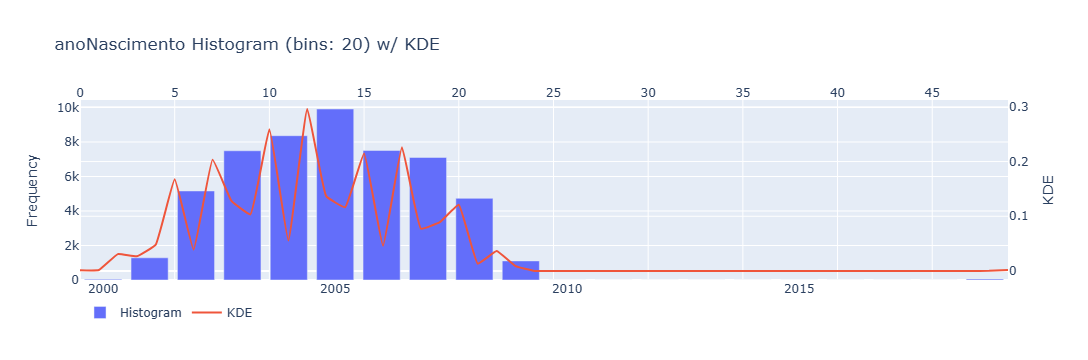

In [69]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)  # Ativa o modo para notebooks
from plotly.offline import iplot

df = DATA
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['anoNascimento'])][['anoNascimento']]
chart, labels = np.histogram(s['anoNascimento'], bins=20)
import scipy.stats as sts
kde = sts.gaussian_kde(s['anoNascimento'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['anoNascimento'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'anoNascimento Histogram (bins: 20) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    
iplot(figure)

C:\Users\cajad\AppData\Local\Temp\ipykernel_5216\3183541229.py:15: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



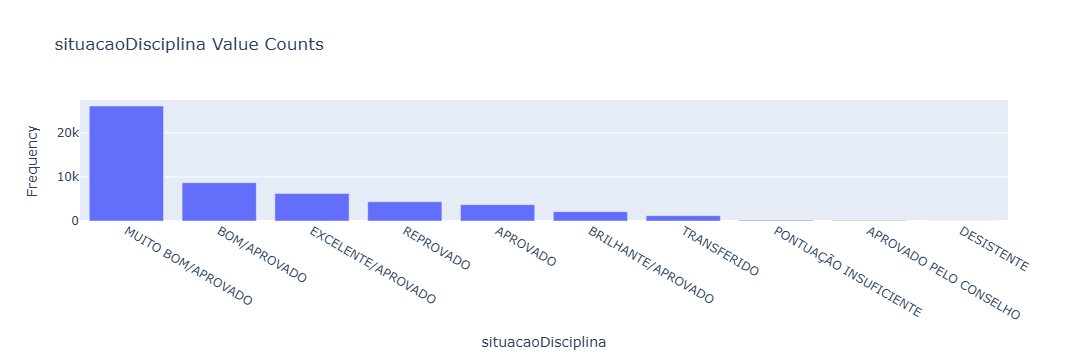

In [67]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['situacaoDisciplina'])]['situacaoDisciplina']
chart = pd.value_counts(s).to_frame(name='data')
chart['percent'] = (chart['data'] / chart['data'].sum()) * 100
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'situacaoDisciplina Value Counts'},
    'xaxis': {'title': {'text': 'situacaoDisciplina'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [9]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Inicializa o modo notebook se estiver usando um Jupyter Notebook
init_notebook_mode(connected=True)

# Mapeamento de IDs para nomes
mapping = {
    48: '1ª SÉRIE',
    49: '2ª SÉRIE',
    50: '3ª SÉRIE'
}

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# Remover índices existentes
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # Atualiza colunas para strings

# Substituir os valores da coluna idSerie pelos nomes correspondentes
df['idSerie'] = df['idSerie'].replace(mapping)

# Processa a coluna 'idSerie'
s = df['idSerie'].fillna('Missing').astype(str)
result = pd.Series(s).value_counts().to_frame(name='data')
result['percent'] = (result['data'] / result['data'].sum()) * 100
result.index.name = 'idSerie'
result = result.rename(columns={'data': 'Frequency', 'percent': 'Percent'})
result = result[result['Frequency'] > 0]
result = result.reset_index().sort_values(['Frequency', 'idSerie'], ascending=[False, True])

# Defina o número de resultados que você quer mostrar
top = 10  # Altere para o número desejado
result = result.head(top)

# Exibição dos resultados (opcional)
print(result)

# Definição do gráfico
chart = {
    'data': [go.Bar(x=result['idSerie'], y=result['Frequency'])],
    'layout': go.Layout(title='Frequência Nº Disciplinas (Séries Ensino Médio)',
                        xaxis=dict(title='Série'),
                        yaxis=dict(title='Frequência'))
}

chart.pop('id', None)  # Para evitar problemas com 'id'
iplot(chart)


NameError: name 'df' is not defined

import pandas as pd

# Criando um dicionário com os dados
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Descrição': [
        'SUPERIOR COMPLETO',
        'ENSINO MÉDIO COMPLETO',
        'ENSINO MÉDIO INCOMPLETO',
        'ENSINO FUNDAMENTAL COMPLETO',
        'ENSINO FUNDAMENTAL INCOMPLETO',
        'NÃO INFORMADA',
        'SUPERIOR INCOMPLETO'
    ]
}

# Criando o DataFrame
tabela = pd.DataFrame(data)

# Exibindo a tabela
print(tabela)
